Songs Table Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39563 entries, 0 to 39562
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           39563 non-null  object 
 1   song_name         39563 non-null  object 
 2   artist_ids        39563 non-null  object 
 3   acousticness      39563 non-null  float64
 4   danceability      39563 non-null  float64
 5   energy            39563 non-null  float64
 6   instrumentalness  39563 non-null  float64
 7   key               39563 non-null  int64  
 8   liveness          39563 non-null  float64
 9   loudness          39563 non-null  float64
 10  mode              39563 non-null  int64  
 11  speechiness       39563 non-null  float64
 12  tempo             39563 non-null  float64
 13  time_signature    39563 non-null  int64  
 14  valence           39563 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 4.5+ MB
None

So

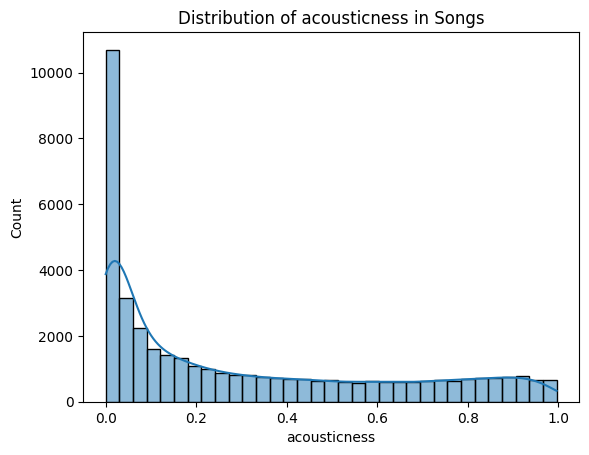

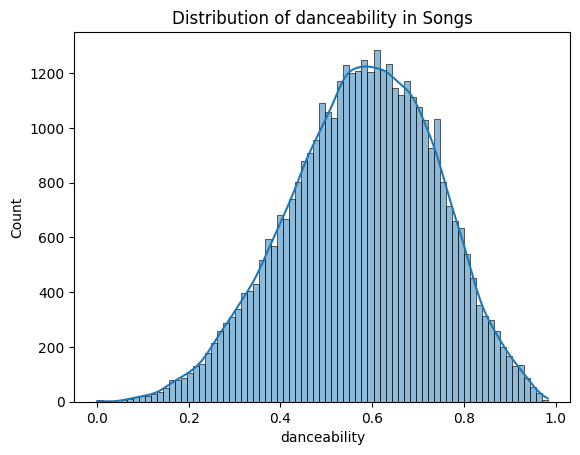

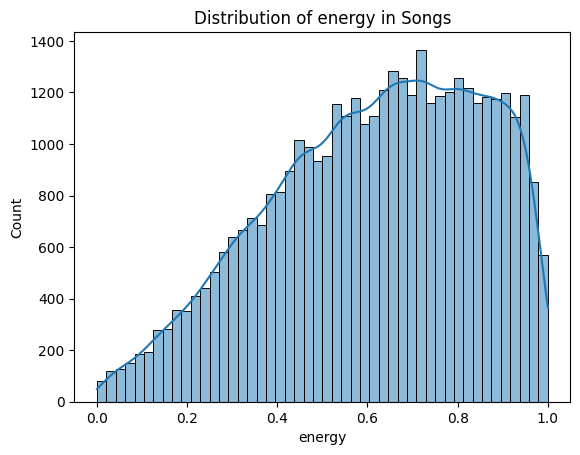

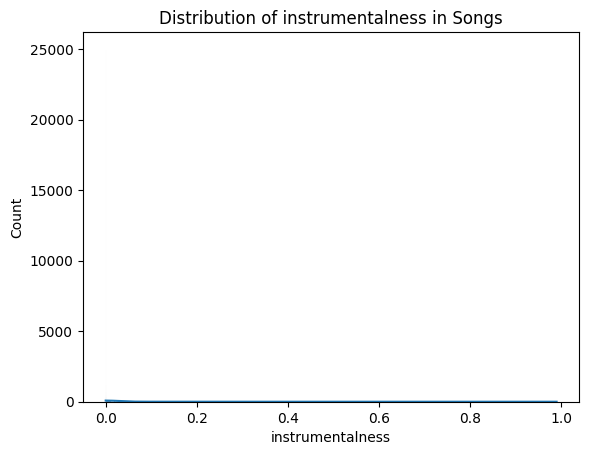

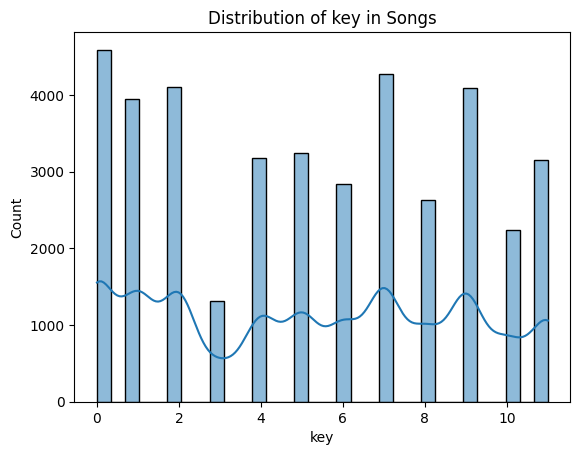

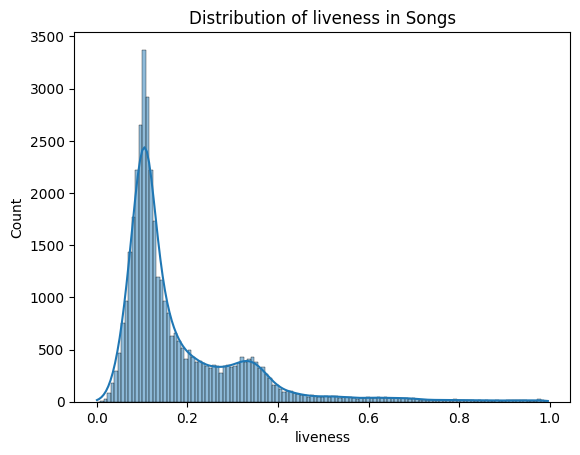

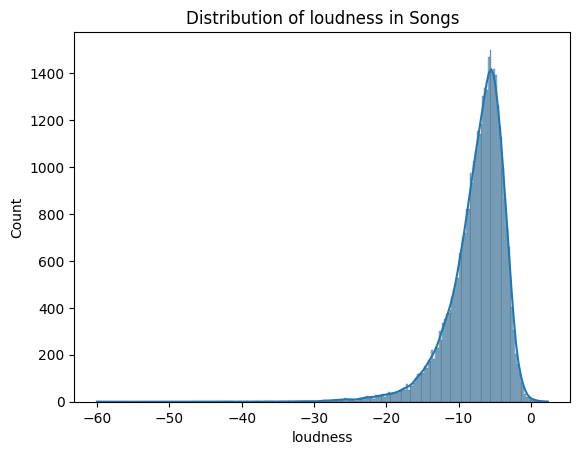

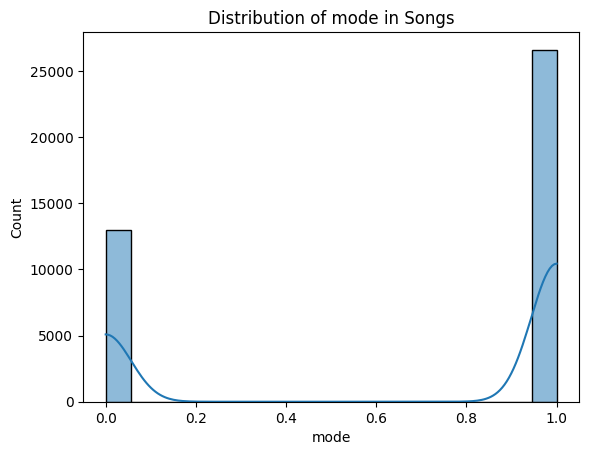

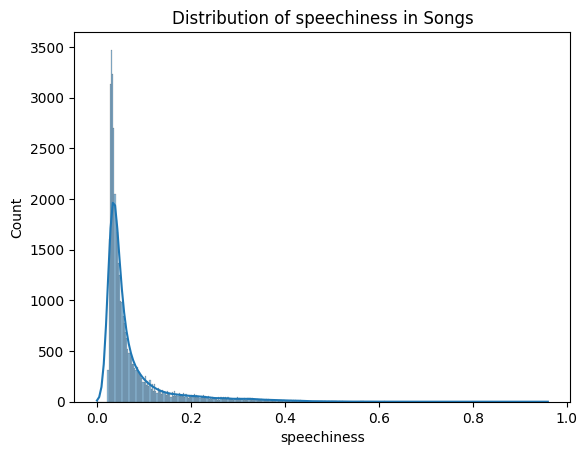

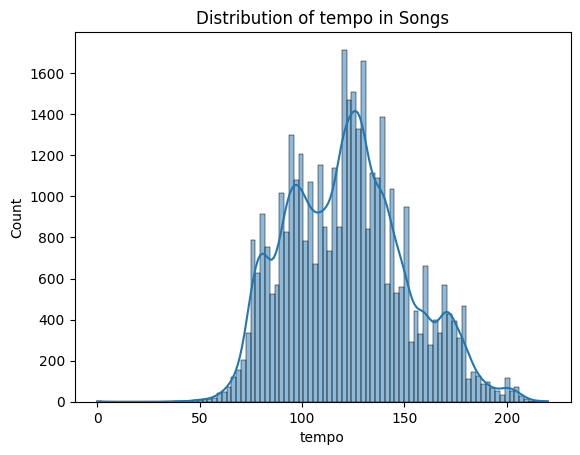

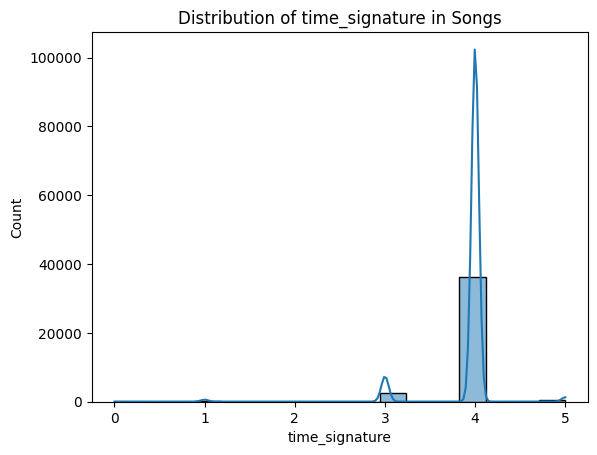

KeyError: 'valenc'

In [12]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the SQLite Database
# Replace 'your_database.db' with the actual path to your SQLite database file.
conn = sqlite3.connect('../data/main.db')

# Load data into pandas DataFrames
songs_df = pd.read_sql_query("SELECT * FROM songs", conn)
playlists_df = pd.read_sql_query("SELECT * FROM playlists", conn)
artists_df = pd.read_sql_query("SELECT * FROM artists", conn)

# Close the connection when done
conn.close()

# Simple EDA

# 1. Overview of the Data
print("Songs Table Overview:")
print(songs_df.info())
print("\nSongs Table Summary Statistics:")
print(songs_df.describe(include='all'))

print("\nPlaylists Table Overview:")
print(playlists_df.info())
print("\nPlaylists Table Summary Statistics:")
print(playlists_df.describe(include='all'))

print("\nArtists Table Overview:")
print(artists_df.info())
print("\nArtists Table Summary Statistics:")
print(artists_df.describe(include='all'))

# 2. Checking for Null Values
print("\nNull Values in Songs Table:")
print(songs_df.isnull().sum())

print("\nNull Values in Playlists Table:")
print(playlists_df.isnull().sum())

print("\nNull Values in Artists Table:")
print(artists_df.isnull().sum())

# 3. Checking for Duplicates
print("\nDuplicate Rows in Songs Table:", songs_df.duplicated().sum())
print("Duplicate Rows in Playlists Table:", playlists_df.duplicated().sum())
print("Duplicate Rows in Artists Table:", artists_df.duplicated().sum())

# 4. Checking for Missing Data
# For numeric columns, checking if there are NaNs
print("\nMissing Data Check (NaNs) in Songs Table:")
print(songs_df.isna().sum())

print("\nMissing Data Check (NaNs) in Playlists Table:")
print(playlists_df.isna().sum())

print("\nMissing Data Check (NaNs) in Artists Table:")
print(artists_df.isna().sum())

# 5. Analyzing Distributions
# Distribution of danceability in songs
sns.histplot(songs_df['acousticness'], kde=True)
plt.title('Distribution of acousticness in Songs')
plt.show()
sns.histplot(songs_df['danceability'], kde=True)
plt.title('Distribution of danceability in Songs')
plt.show()
sns.histplot(songs_df['energy'], kde=True)
plt.title('Distribution of energy in Songs')
plt.show()
sns.histplot(songs_df['instrumentalness'], kde=True)
plt.title('Distribution of instrumentalness in Songs')
plt.show()
sns.histplot(songs_df['key'], kde=True)
plt.title('Distribution of key in Songs')
plt.show()
sns.histplot(songs_df['liveness'], kde=True)
plt.title('Distribution of liveness in Songs')
plt.show()
sns.histplot(songs_df['loudness'], kde=True)
plt.title('Distribution of loudness in Songs')
plt.show()
sns.histplot(songs_df['mode'], kde=True)
plt.title('Distribution of mode in Songs')
plt.show()
sns.histplot(songs_df['speechiness'], kde=True)
plt.title('Distribution of speechiness in Songs')
plt.show()
sns.histplot(songs_df['tempo'], kde=True)
plt.title('Distribution of tempo in Songs')
plt.show()
sns.histplot(songs_df['time_signature'], kde=True)
plt.title('Distribution of time_signature in Songs')
plt.show()
sns.histplot(songs_df['valence'], kde=True)
plt.title('Distribution of valence in Songs')
plt.show()

# Distribution of energy in playlists
sns.histplot(playlists_df['min_energy'], kde=True)
plt.title('Distribution of Minimum Energy in Playlists')
plt.show()
sns.histplot(playlists_df['max_energy'], kde=True)
plt.title('Distribution of Maximum Energy in Playlists')
plt.show()

# 6. Correlation Analysis
# Select only numeric columns for correlation matrix
numeric_columns = songs_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
songs_corr = numeric_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(songs_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Songs')
plt.show()

# 7. Analyze relationships (example: Energy vs Danceability)
sns.scatterplot(data=songs_df, x='energy', y='danceability', hue='mode')
plt.title('Energy vs Danceability in Songs')
plt.show()

# 8. Analyzing Artist Genres
# Number of genres per artist
artists_df['num_genres'] = artists_df['artist_genres'].apply(lambda x: len(str(x).split(',')))
sns.histplot(artists_df['num_genres'], bins=20, kde=True)
plt.title('Number of Genres per Artist')
plt.show()

# Most common genres
all_genres = artists_df['artist_genres'].str.split(',', expand=True).stack().value_counts()
top_genres = all_genres.head(20)

# Plotting the top genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 20 Genres')
plt.show()

# 9. Checking for Unique Values in Categorical Columns
print("\nUnique Values in Songs Table:")
for column in songs_df.select_dtypes(include='object').columns:
    print(f"{column}: {songs_df[column].nunique()} unique values")

print("\nUnique Values in Playlists Table:")
for column in playlists_df.select_dtypes(include='object').columns:
    print(f"{column}: {playlists_df[column].nunique()} unique values")

print("\nUnique Values in Artists Table:")
for column in artists_df.select_dtypes(include='object').columns:
    print(f"{column}: {artists_df[column].nunique()} unique values")
